In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier as GDBSklearn
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
%matplotlib inline
df = pd.read_csv("smoking.csv")
df.head(10)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
6,6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1
7,7,M,45,165,90,96.0,1.2,1.0,1.0,1.0,...,15.0,1.0,1.3,38.0,71.0,111.0,Y,0,Y,0
8,9,F,50,150,60,85.0,0.7,0.8,1.0,1.0,...,13.7,1.0,0.8,31.0,31.0,14.0,Y,0,N,0
9,10,M,45,175,75,89.0,1.0,1.0,1.0,1.0,...,16.0,1.0,0.8,26.0,24.0,63.0,Y,0,N,0


#Предобработка данных

In [ ]:
#вывод информации и данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [ ]:
df = df.drop_duplicates() #удаляем повторяющиеся записи
print(df.isnull().sum())

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    5
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64


In [ ]:
df = df.dropna() #Удаляем Nan, чтобы не было пустых строк

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55687 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55687 non-null  int64  
 1   gender               55687 non-null  object 
 2   age                  55687 non-null  int64  
 3   height(cm)           55687 non-null  int64  
 4   weight(kg)           55687 non-null  int64  
 5   waist(cm)            55687 non-null  float64
 6   eyesight(left)       55687 non-null  float64
 7   eyesight(right)      55687 non-null  float64
 8   hearing(left)        55687 non-null  float64
 9   hearing(right)       55687 non-null  float64
 10  systolic             55687 non-null  float64
 11  relaxation           55687 non-null  float64
 12  fasting blood sugar  55687 non-null  float64
 13  Cholesterol          55687 non-null  float64
 14  triglyceride         55687 non-null  float64
 15  HDL                  55687 non-null 

In [ ]:
df = df.drop(['oral', 'tartar', 'ID', 'Urine protein', 'eyesight(left)', 'eyesight(right)','hearing(left)', 'hearing(right)'], axis=1)
df.head(5)

,gender,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,F,40,155,60,81.3,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,0.7,18.0,19.0,27.0,0,0
1,F,40,160,60,81.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,0.6,22.0,19.0,18.0,0,0
2,M,55,170,60,80.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,21.0,16.0,22.0,0,1
3,M,40,165,70,88.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,19.0,26.0,18.0,0,0
4,F,40,155,60,86.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,0.6,16.0,14.0,22.0,0,0


In [ ]:
#заменим F  на 0, M - 1
df.loc[(df.gender == "F"), 'gender'] = 0
df.loc[(df.gender == "M"), 'gender'] = 1
df.head(5)

,gender,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,40,155,60,81.3,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,0.7,18.0,19.0,27.0,0,0
1,0,40,160,60,81.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,0.6,22.0,19.0,18.0,0,0
2,1,55,170,60,80.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,21.0,16.0,22.0,0,1
3,1,40,165,70,88.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,19.0,26.0,18.0,0,0
4,0,40,155,60,86.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,0.6,16.0,14.0,22.0,0,0


#определние выбросов

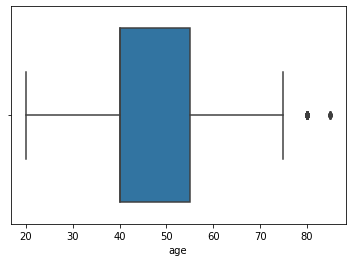

In [ ]:
sns.boxplot(x=df['age'])

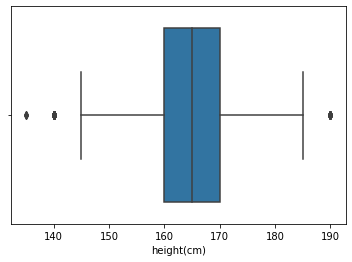

In [ ]:
sns.boxplot(x=df['height(cm)'])

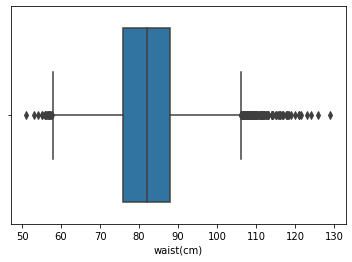

In [ ]:
sns.boxplot(x=df['waist(cm)'])

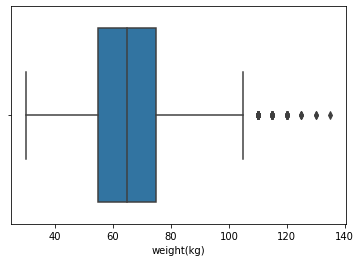

In [ ]:
sns.boxplot(x=df['weight(kg)'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                    15.0
height(cm)             10.0
weight(kg)             20.0
waist(cm)              12.0
eyesight(left)          0.4
eyesight(right)         0.4
systolic               18.0
relaxation             12.0
fasting blood sugar    15.0
Cholesterol            48.0
triglyceride           86.0
HDL                    19.0
LDL                    44.0
hemoglobin              2.2
Urine protein           0.0
serum creatinine        0.2
AST                     9.0
ALT                    16.0
Gtp                    26.0
smoking                 1.0
dtype: float64


<ipython-input-10-d7397e803310>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-10-d7397e803310>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-53-f4e1682787c4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(38525, 19)

<ipython-input-54-d8c3c7b99705>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking
age,1.000000,-0.487131,-0.319966,-0.011834,0.120509,0.070428,0.188418,0.130520,0.048708,-0.002255,0.125225,-0.301004,-0.182862,0.172168,-0.062256,-0.006250,-0.114072,-0.170372
height(cm),-0.487131,1.000000,0.682728,0.371353,0.085102,0.098431,0.010825,-0.124111,0.122554,-0.212282,-0.084232,0.563842,0.466490,0.007580,0.226722,0.230111,0.079158,0.387116
weight(kg),-0.319966,0.682728,1.000000,0.802342,0.255548,0.235564,0.138266,-0.009913,0.279820,-0.351160,0.042312,0.494127,0.394453,0.103265,0.400544,0.339150,0.065026,0.283304
waist(cm),-0.011834,0.371353,0.802342,1.000000,0.294901,0.258609,0.206141,0.053058,0.328442,-0.374875,0.104257,0.367084,0.263587,0.156048,0.397315,0.363741,0.034753,0.196918
systolic,0.120509,0.085102,0.255548,0.294901,1.000000,0.734929,0.190984,0.048637,0.170233,-0.089683,0.031146,0.178091,0.068577,0.129787,0.163577,0.203526,0.020964,0.055117
relaxation,0.070428,0.098431,0.235564,0.258609,0.734929,1.000000,0.162183,0.082168,0.183642,-0.089895,0.062599,0.204619,0.082645,0.108357,0.156713,0.217419,0.022290,0.081474
fasting blood sugar,0.188418,0.010825,0.138266,0.206141,0.190984,0.162183,1.000000,0.071310,0.198439,-0.090592,0.045663,0.071195,0.052058,0.054003,0.129948,0.186224,0.015240,0.057333
Cholesterol,0.130520,-0.124111,-0.009913,0.053058,0.048637,0.082168,0.071310,1.000000,0.240011,0.180790,0.914643,-0.003266,-0.009123,0.082078,0.078729,0.108333,-0.015789,-0.057132
triglyceride,0.048708,0.122554,0.279820,0.328442,0.170233,0.183642,0.198439,0.240011,1.000000,-0.424541,0.087401,0.234332,0.121630,0.101673,0.270353,0.355005,0.023710,0.212719
HDL,-0.002255,-0.212282,-0.351160,-0.374875,-0.089683,-0.089895,-0.090592,0.180790,-0.424541,1.000000,-0.082866,-0.252657,-0.192347,-0.032438,-0.237660,-0.168722,-0.031918,-0.188852


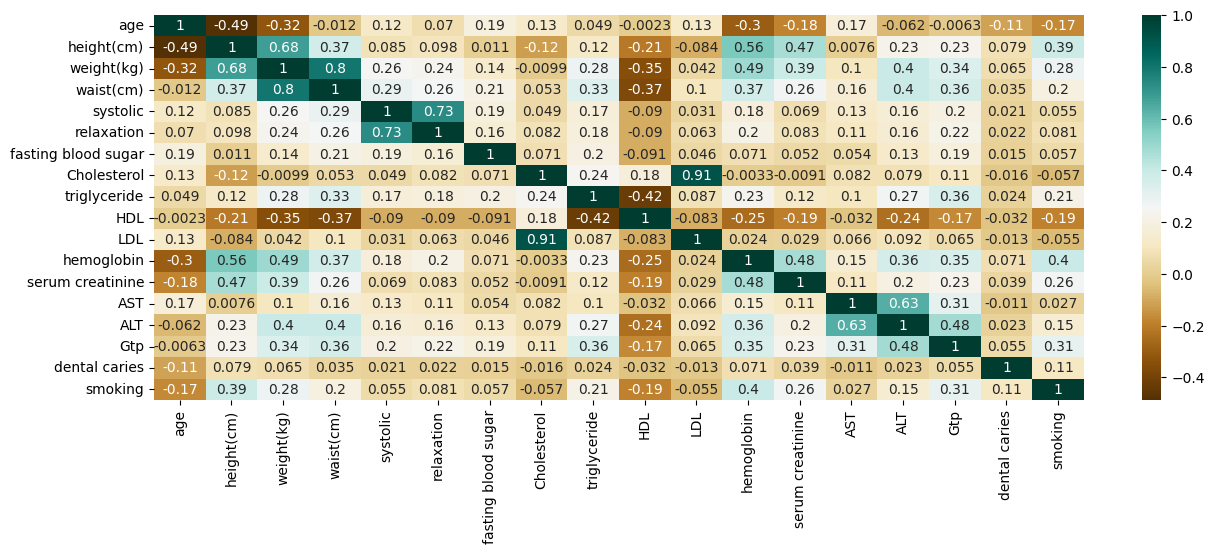

In [ ]:
plt.figure(figsize=(15,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

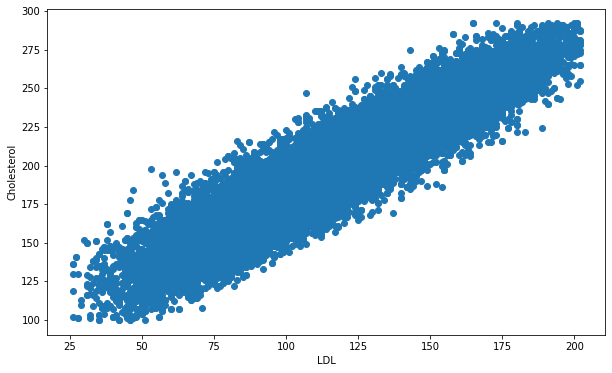

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['LDL'], df['Cholesterol'])
ax.set_xlabel('LDL')
ax.set_ylabel('Cholesterol')
plt.show()

#разбиение признаков и целевой функции

In [ ]:
X = df.copy()
X['smoking']  = le.fit_transform(X['smoking']) # Кодировка целевых классов со значением от 0 до n_classes-1.
y = X.pop('smoking') # вырезание и присваивание

In [ ]:
#разбиение тестовой и обучающей выборки
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

KNN

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      8486
           1       0.67      0.66      0.66      4228

    accuracy                           0.78     12714
   macro avg       0.75      0.75      0.75     12714
weighted avg       0.78      0.78      0.78     12714


Confusion Matrix

[[7089 1397]
 [1443 2785]]


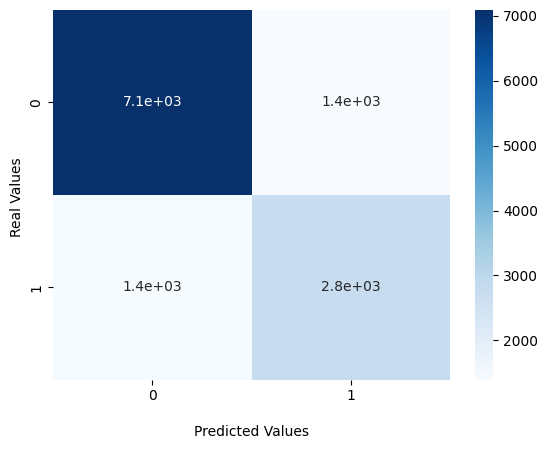

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print(classification_report(y_test, y_pred))
print("\nConfusion Matrix\n")
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

ax = sns.heatmap(matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Real Values ');
plt.show()


#дерево решений


Confusion Matrix

[[7030 1456]
 [1433 2795]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      8486
           1       0.66      0.66      0.66      4228

    accuracy                           0.77     12714
   macro avg       0.74      0.74      0.74     12714
weighted avg       0.77      0.77      0.77     12714



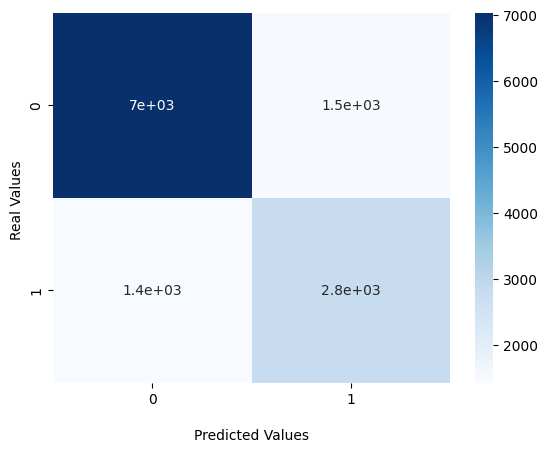

In [ ]:
from sklearn import tree
model = DecisionTreeClassifier(criterion='gini', class_weight = 'balanced')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("\nConfusion Matrix\n")
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
print(classification_report(y_test,y_pred))
ax = sns.heatmap(matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Real Values ');
plt.show()

# tree.plot_tree(model)

#SVM

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      8486
           1       0.70      0.64      0.67      4228

    accuracy                           0.79     12714
   macro avg       0.76      0.75      0.76     12714
weighted avg       0.79      0.79      0.79     12714

Confusion Matrix:
[[7325 1161]
 [1519 2709]]


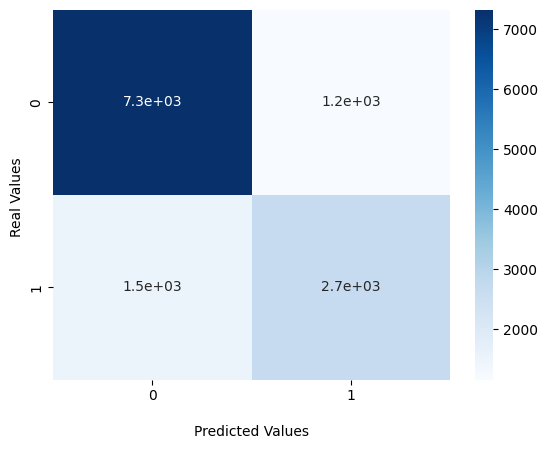

In [ ]:
#clf =  svm.SVC(kernel = 'linear')
C = 10  # = self._alpha in our algorithm
#model1 = svm.SVC(kernel='linear', C=C)
#clf = svm.LinearSVC(C=C, max_iter=10000)
clf = svm.SVC(kernel='rbf', gamma=10, C=C)
#clf = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Real Values ');
plt.show()